In [0]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import queue
import pydot
import json
from networkx.drawing.nx_pydot import graphviz_layout
from collections import deque, OrderedDict
from google.colab import files

In [0]:
# (u, v, weight)
good_graph = [
        (1, 2, 7),
        (1, 3, 9),
        (1, 6, 14),
        (2, 3, 10),
        (2, 4, 15),
        (3, 4, 11),
        (3, 6, 2),
        (4, 5, 6),
        (5, 6, 9)
        ]

bad_graph = [
        (1,2,4),
        (1,4,4),
        (3,1,3),
        (3,4,2),
        (4,5,-2),
        (4,6,4),
        (5,2,3),
        (5,6,-3),
        (6,3,1),
        (6,7,-2),
        (7,5,2),
        (7,8,2),
        (8,6,-2)     
]

good_g = nx.Graph()
good_g.add_weighted_edges_from(good_graph)
bad_g = nx.DiGraph()
bad_g.add_weighted_edges_from(bad_graph)

In [0]:
def draw(g, pos, node_colors, marked_edges=[], visited={}, cycle_edge=None, count=0, new_marked_edges=[]):
  edge_labels = nx.get_edge_attributes(g, 'weight')

  nx.draw(g, pos, node_color=node_colors.values(), with_labels=True, font_color='white')
  nx.draw_networkx_edges(g, pos=pos, edgelist=marked_edges, width=5, alpha=0.5, edge_color='b')
  nx.draw_networkx_edges(g, pos=pos, edgelist=new_marked_edges, width=5, alpha=0.5, edge_color='g')

  #if cycle_edge != None:
  # nx.draw_networkx_edges(g, pos=pos, edgelist=[cycle_edge], width=7, alpha=0.5, edge_color='r')
  nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
  
  for node, position in zip(g.nodes(), pos.values()):
    if node in visited:
      plt.text(position[0], position[1]+10, s=f'{visited[node]}', bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
  plt.savefig(f'graph{count}.png')
  files.download(f'graph{count}.png')
  plt.show()

In [0]:
# The main function that finds shortest distances from src to 
# all other vertices using Bellman-Ford algorithm.  The function 
# also detects negative weight cycle 
def bellman_ford(graph, src): 
  count = 0
  get_marked_edges = lambda p: [(p[e],e) for e in p]
  subtract = lambda x,y: [item for item in x if item not in y]
  color_map = OrderedDict([(node, '#0398fc') for node in graph.nodes()])
  pos = graphviz_layout(graph, 'neato', src)

  # Step 1: Initialize distances from src to all other vertices 
  # as INFINITE 
  dist = dict([(node, float("Inf")) for node in graph.nodes()])  
  dist[src] = 0
  color_map[src] = '#fc0335'
  marked_edges = {}
  new_marked_edges = {}
  
  draw(graph, pos, color_map, get_marked_edges(marked_edges), dist, count=count)
  count += 1

  # Step 2: Relax all edges |V| - 1 times. A simple shortest  
  # path from src to any other vertex can have at-most |V| - 1  
  # edges 
  for i in range(graph.number_of_nodes() - 1): 
    # Update dist value and parent index of the adjacent vertices of 
    # the picked vertex. Consider only those vertices which are still in 
    # queue
    temp_dist = {}
    for u, v, w in graph.edges(data='weight'): 
      print(f'Relaxing: ({u}, {v}) -> {w}')
      if dist[u] != float("Inf") and dist[u] + w < dist[v]: 
        if dist[u] != float("Inf") and (v in marked_edges or v in new_marked_edges):
          print(f'Relaxed: ({marked_edges[v] if v in marked_edges else new_marked_edges[v]}, {v}) to ({u}, {v})')
        temp_dist[v] = dist[u] + w
        new_marked_edges[v] = u

    for v, w in temp_dist.items():
      dist[v] = temp_dist[v]
    draw(graph, pos, color_map, subtract(get_marked_edges(marked_edges), get_marked_edges(new_marked_edges)), dist, count=count, new_marked_edges=get_marked_edges(new_marked_edges))
    
    for v, u in new_marked_edges.items():
      marked_edges[v] = u
    new_marked_edges.clear()
    count += 1

  # Step 3: check for negative-weight cycles.  The above step  
  # guarantees shortest distances if graph doesn't contain  
  # negative weight cycle.  If we get a shorter path, then there 
  # is a cycle. 

  for u, v, w in graph.edges(data='weight'): 
    if dist[u] != float("Inf") and dist[u] + w < dist[v]: 
      color_map[v] = '#B2B200'
      draw(graph, pos, color_map, get_marked_edges(marked_edges), dist, (u,v), count)
      print("Graph contains negative weight cycle")
      return
                    
  return dist 

In [0]:
bellman_ford(good_g, 1)

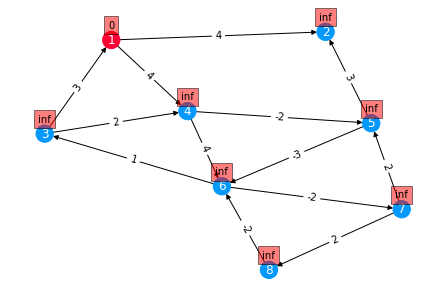

Relaxing: (1, 2) -> 4
Relaxing: (1, 4) -> 4
Relaxing: (4, 5) -> -2
Relaxing: (4, 6) -> 4
Relaxing: (3, 1) -> 3
Relaxing: (3, 4) -> 2
Relaxing: (5, 2) -> 3
Relaxing: (5, 6) -> -3
Relaxing: (6, 3) -> 1
Relaxing: (6, 7) -> -2
Relaxing: (7, 5) -> 2
Relaxing: (7, 8) -> 2
Relaxing: (8, 6) -> -2


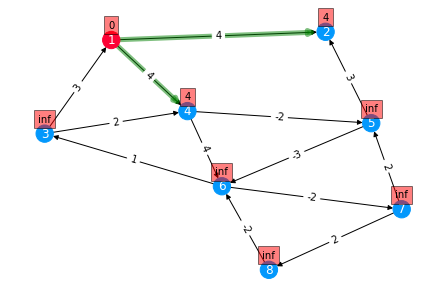

Relaxing: (1, 2) -> 4
Relaxing: (1, 4) -> 4
Relaxing: (4, 5) -> -2
Relaxing: (4, 6) -> 4
Relaxing: (3, 1) -> 3
Relaxing: (3, 4) -> 2
Relaxing: (5, 2) -> 3
Relaxing: (5, 6) -> -3
Relaxing: (6, 3) -> 1
Relaxing: (6, 7) -> -2
Relaxing: (7, 5) -> 2
Relaxing: (7, 8) -> 2
Relaxing: (8, 6) -> -2


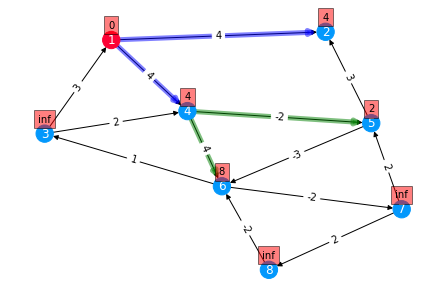

Relaxing: (1, 2) -> 4
Relaxing: (1, 4) -> 4
Relaxing: (4, 5) -> -2
Relaxing: (4, 6) -> 4
Relaxing: (3, 1) -> 3
Relaxing: (3, 4) -> 2
Relaxing: (5, 2) -> 3
Relaxing: (5, 6) -> -3
Relaxed: (4, 6) to (5, 6)
Relaxing: (6, 3) -> 1
Relaxing: (6, 7) -> -2
Relaxing: (7, 5) -> 2
Relaxing: (7, 8) -> 2
Relaxing: (8, 6) -> -2


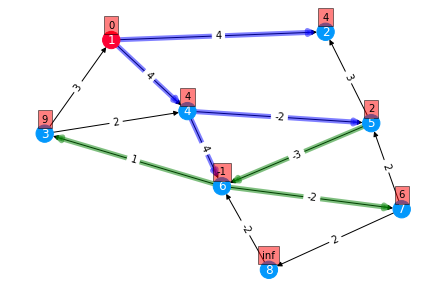

Relaxing: (1, 2) -> 4
Relaxing: (1, 4) -> 4
Relaxing: (4, 5) -> -2
Relaxing: (4, 6) -> 4
Relaxing: (3, 1) -> 3
Relaxing: (3, 4) -> 2
Relaxing: (5, 2) -> 3
Relaxing: (5, 6) -> -3
Relaxing: (6, 3) -> 1
Relaxed: (6, 3) to (6, 3)
Relaxing: (6, 7) -> -2
Relaxed: (6, 7) to (6, 7)
Relaxing: (7, 5) -> 2
Relaxing: (7, 8) -> 2
Relaxing: (8, 6) -> -2


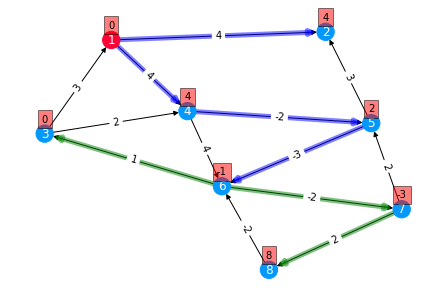

Relaxing: (1, 2) -> 4
Relaxing: (1, 4) -> 4
Relaxing: (4, 5) -> -2
Relaxing: (4, 6) -> 4
Relaxing: (3, 1) -> 3
Relaxing: (3, 4) -> 2
Relaxed: (1, 4) to (3, 4)
Relaxing: (5, 2) -> 3
Relaxing: (5, 6) -> -3
Relaxing: (6, 3) -> 1
Relaxing: (6, 7) -> -2
Relaxing: (7, 5) -> 2
Relaxed: (4, 5) to (7, 5)
Relaxing: (7, 8) -> 2
Relaxed: (7, 8) to (7, 8)
Relaxing: (8, 6) -> -2


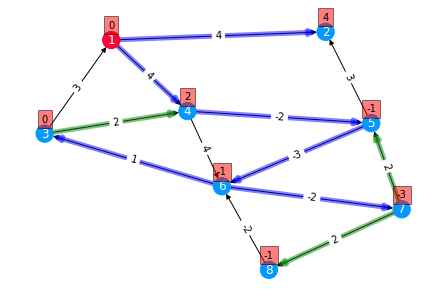

Relaxing: (1, 2) -> 4
Relaxing: (1, 4) -> 4
Relaxing: (4, 5) -> -2
Relaxing: (4, 6) -> 4
Relaxing: (3, 1) -> 3
Relaxing: (3, 4) -> 2
Relaxing: (5, 2) -> 3
Relaxed: (1, 2) to (5, 2)
Relaxing: (5, 6) -> -3
Relaxed: (5, 6) to (5, 6)
Relaxing: (6, 3) -> 1
Relaxing: (6, 7) -> -2
Relaxing: (7, 5) -> 2
Relaxing: (7, 8) -> 2
Relaxing: (8, 6) -> -2
Relaxed: (5, 6) to (8, 6)


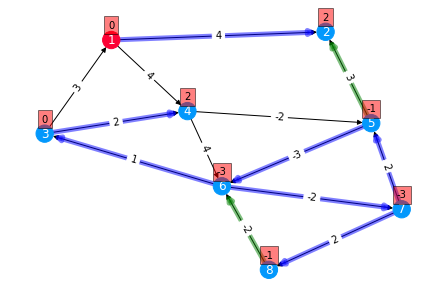

Relaxing: (1, 2) -> 4
Relaxing: (1, 4) -> 4
Relaxing: (4, 5) -> -2
Relaxing: (4, 6) -> 4
Relaxing: (3, 1) -> 3
Relaxing: (3, 4) -> 2
Relaxing: (5, 2) -> 3
Relaxing: (5, 6) -> -3
Relaxed: (8, 6) to (5, 6)
Relaxing: (6, 3) -> 1
Relaxed: (6, 3) to (6, 3)
Relaxing: (6, 7) -> -2
Relaxed: (6, 7) to (6, 7)
Relaxing: (7, 5) -> 2
Relaxing: (7, 8) -> 2
Relaxing: (8, 6) -> -2


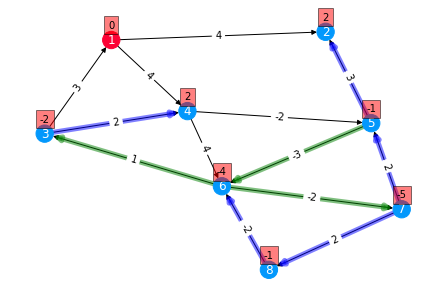

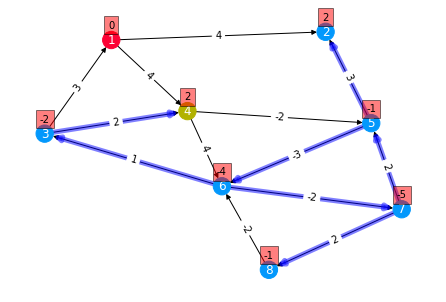

Graph contains negative weight cycle


In [49]:
bellman_ford(bad_g, 1)